# Augmentation

In [1]:
import sys
sys.path.append('../../')

from dl.data.objdetn import datasets
from dl.data.objdetn import transforms, target_transforms, augmentations, utils

%matplotlib notebook
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from dl.data.utils.converter import toVisualizeRectRGBimg

# Geometric distortions

## Random Expand

[[123 116 217 225]]
(123, 116) (217, 225)


<IPython.core.display.Javascript object>


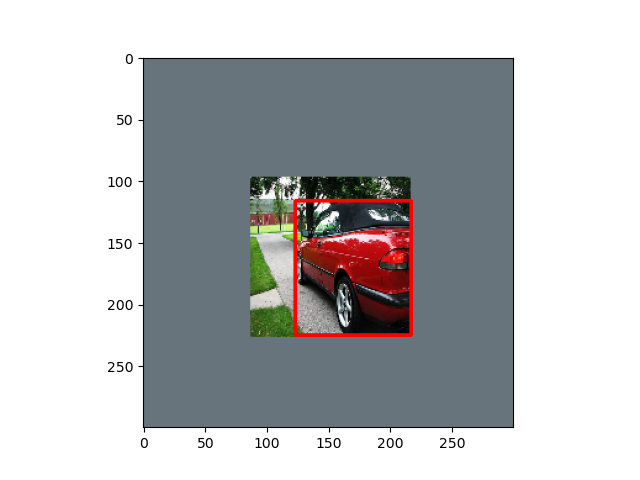

[[154  74 177 123]]
(154, 74) (177, 123)


<IPython.core.display.Javascript object>


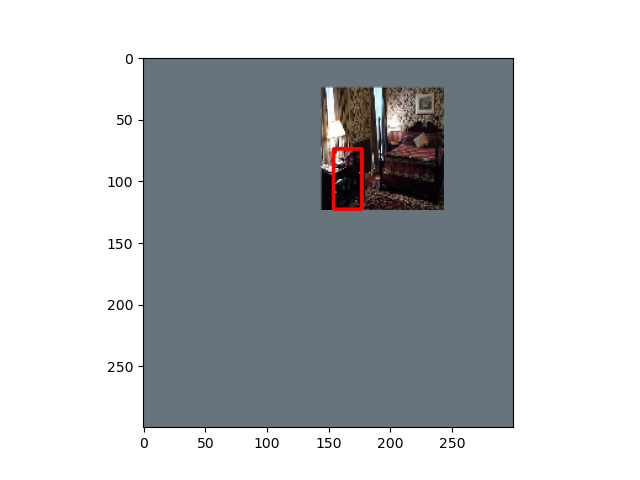

[[198  44 245  75]]
(198, 44) (245, 75)


<IPython.core.display.Javascript object>


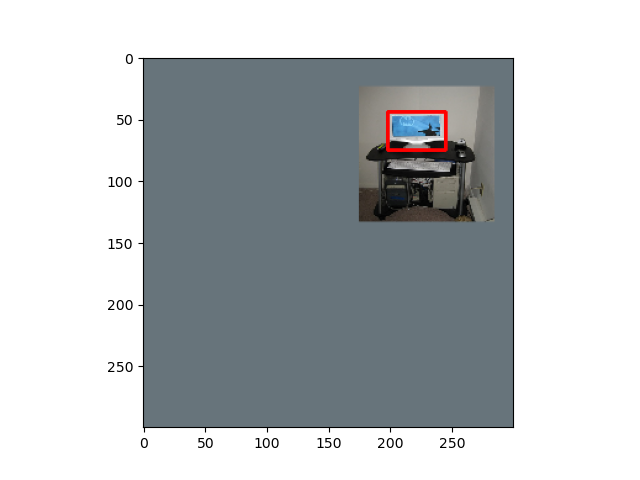

[[ 88  85 294 189]]
(88, 85) (294, 189)


<IPython.core.display.Javascript object>


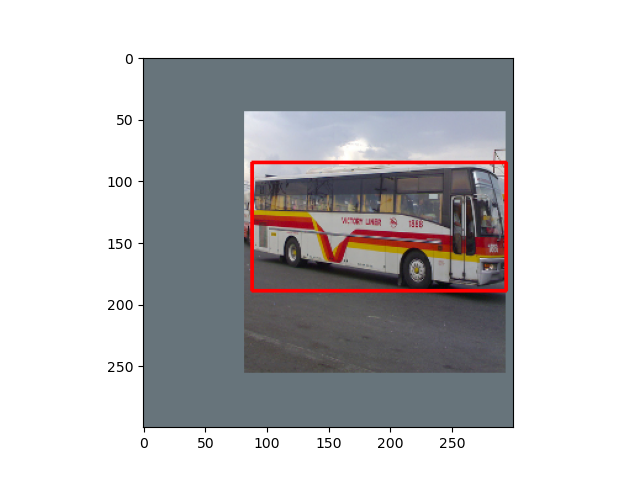

In [2]:
augmentation = augmentations.RandomExpand(filled_rgb=(103.939, 116.779, 123.68), rmin=1, rmax=4, p=1)

transform = transforms.Compose(
    [transforms.Resize((300, 300)),
     transforms.ToTensor()]
)
target_transform = target_transforms.Compose(
    [target_transforms.Corners2Centroids(),
     target_transforms.OneHot(class_nums=datasets.VOC_class_nums, add_background=True),
     target_transforms.ToTensor()]
)
train_dataset = datasets.Compose(datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 ignore=target_transforms.Ignore(difficult=True), transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectRGBimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)

## Random Sample

[[ 84  45 300 297]]
(84, 45) (300, 297)


<IPython.core.display.Javascript object>


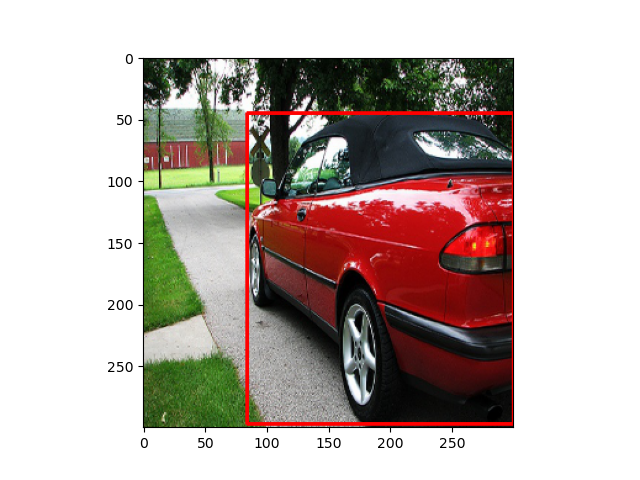

[[208 258 235 300]]
(208, 258) (235, 300)


<IPython.core.display.Javascript object>


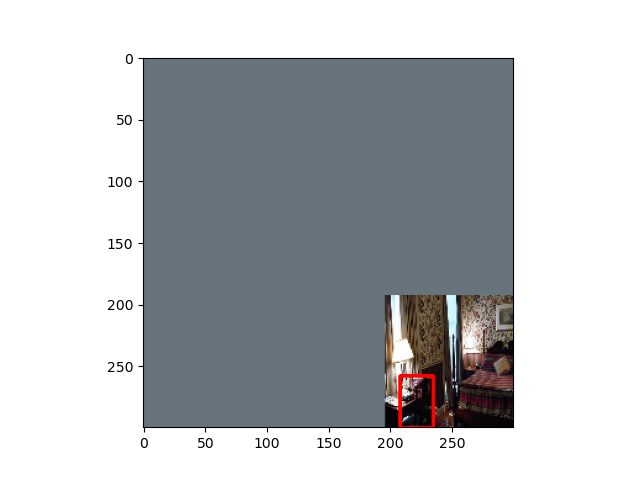

[[ 35 206 108 300]]
(35, 206) (108, 300)


<IPython.core.display.Javascript object>


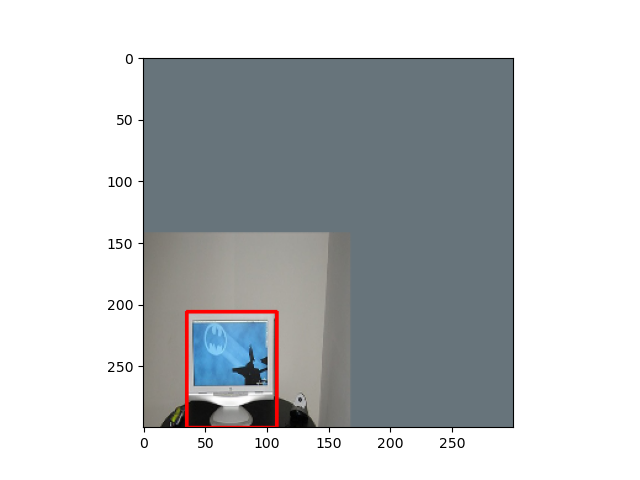

[[  0  82 261 153]]
(0, 82) (261, 153)


<IPython.core.display.Javascript object>


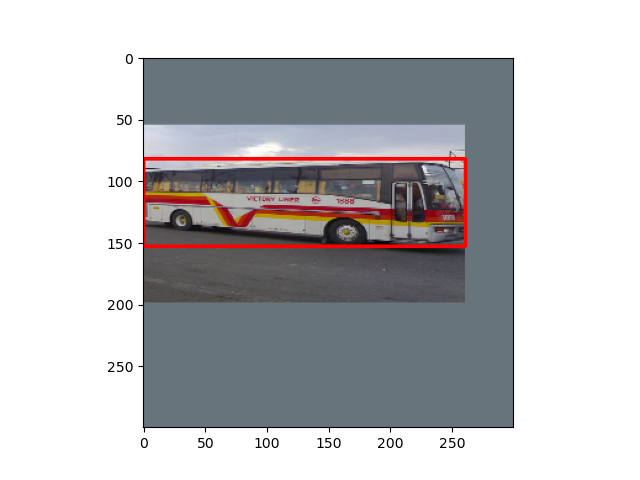

In [3]:
augmentation = augmentations.Compose([
    augmentations.RandomExpand(),
    augmentations.RandomSampled()
])

train_dataset = datasets.Compose(datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 ignore=target_transforms.Ignore(difficult=True), transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectRGBimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)

## Random Flip

[[215  45   0 297]]
(215, 45) (0, 297)


<IPython.core.display.Javascript object>


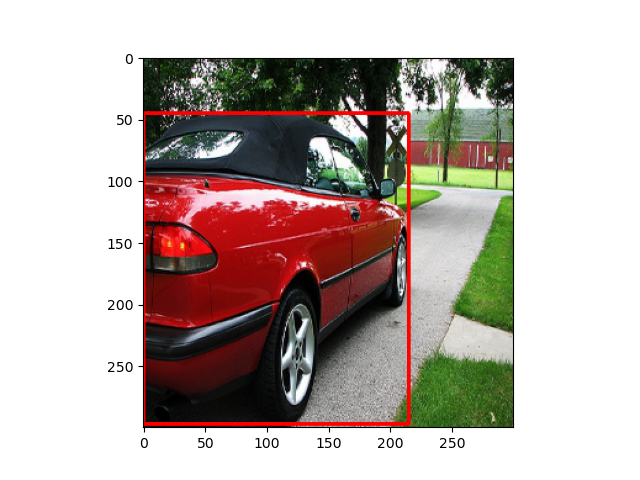

[[268 149 199 299]]
(268, 149) (199, 299)


<IPython.core.display.Javascript object>


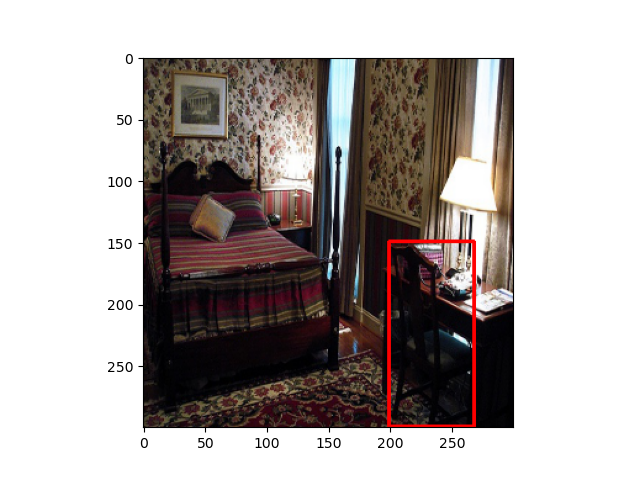

[[234  57 106 142]]
(234, 57) (106, 142)


<IPython.core.display.Javascript object>


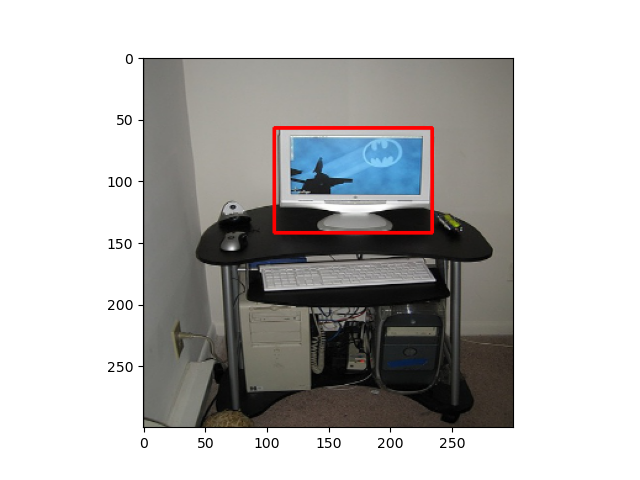

[[291  58   0 205]]
(291, 58) (0, 205)


<IPython.core.display.Javascript object>


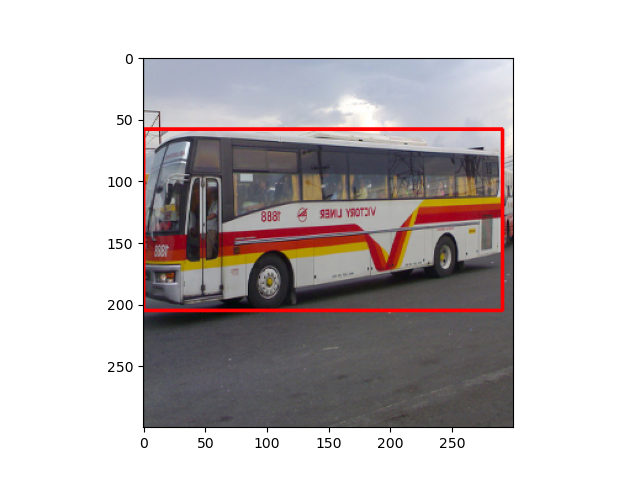

In [4]:
augmentation = augmentations.RandomFlip(p=1)

train_dataset = datasets.Compose(datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 ignore=target_transforms.Ignore(difficult=True), transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectRGBimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)